# Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Reading CSV file

In [4]:
df = pd.read_csv("C:\\Users\\hp\\OneDrive\\Desktop\\911.csv")

# Exploratory Data Analysis and Visualization

In [10]:
# checking the info() of the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [11]:
# Check the head of df
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [184]:
# Top five zipcodes for 911 calls
df['zip'].value_counts().head(5)

zip
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: count, dtype: int64

In [179]:
# Top five Township for 911 calls
df['twp'].value_counts().head()

twp
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: count, dtype: int64

In [185]:
# Bottom five Township for 911 calls
df['twp'].value_counts().tail()

twp
BRYN ATHYN       173
SALFORD          163
GREEN LANE        51
PHILA COUNTY      43
LEHIGH COUNTY     30
Name: count, dtype: int64

In [186]:
# Number of unique title codes
df['title'].nunique()

110

In [132]:
# New Column for Reason
df['Reason'] = df['title'].apply(lambda title:title.split(':')[0])

In [187]:
# Most common reason for a 911 call
df['Reason'].value_counts()

Reason
EMS        48877
Traffic    35695
Fire       14920
Name: count, dtype: int64

<Axes: xlabel='Reason', ylabel='count'>

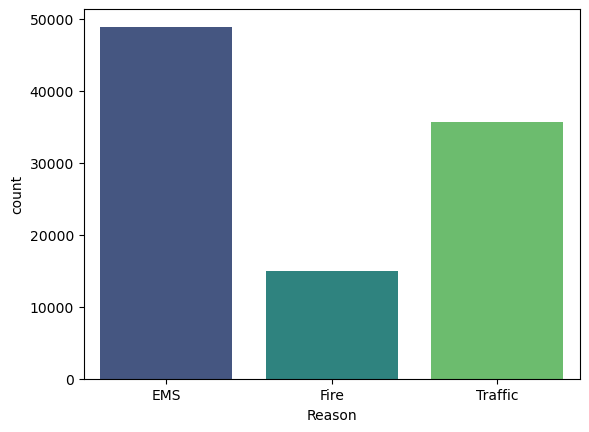

In [188]:
# Countplot of 911 calls by Reason
sns.countplot(df,x='Reason',palette='viridis')

In [130]:
# Data type of the objects in the timestamp column
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [129]:
# covert column from strings to DateTime objects
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [128]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [225]:
# Grabbing hour, dayofweek and Month using apply 
df['Hour'] = df['timeStamp'].apply(lambda time:time.hour)
df['Day of Week'] = df['timeStamp'].apply(lambda time:time.dayofweek)
df['Month'] = df['timeStamp'].apply(lambda time:time.month)

In [226]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week,Month,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,3,12,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,3,12,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,3,12,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,3,12,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,3,12,2015-12-10


In [227]:
# Dictionary has numbers as keys mapping to values which is the day of the week
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [233]:
# Map the numbers to DAY of week using the map function
df['Day of Week'] = df['Day of Week'].map(dmap)

In [235]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week,Month,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,Thu,12,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,Thu,12,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,Thu,12,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,Thu,12,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,Thu,12,2015-12-10


<Axes: xlabel='Day of Week', ylabel='count'>

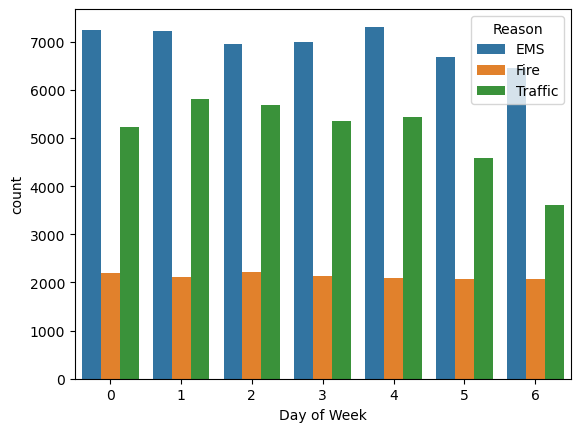

In [229]:
# Countplot of the Day of week column with hue based off the Reason column
sns.countplot(x='Day of Week',data=df,hue='Reason')

<Axes: xlabel='Month', ylabel='count'>

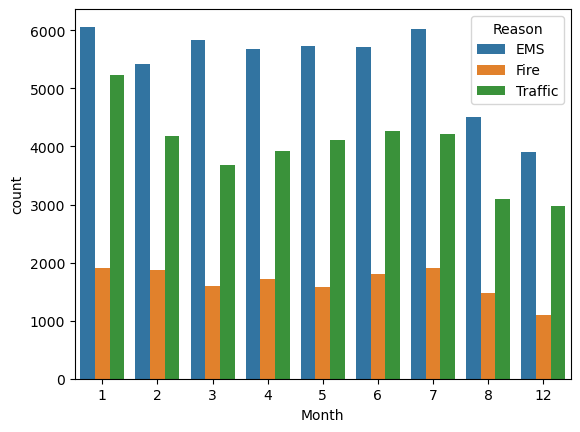

In [197]:
# Countplot of the Month column with hue based off the Reason column
sns.countplot(x='Month',data=df,hue='Reason')

In [ ]:
# some months are missing! 9,10, and 11 are not there.

In [236]:
# Groupby Month and Count 
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week,Date
Month,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423


<Axes: xlabel='Month'>

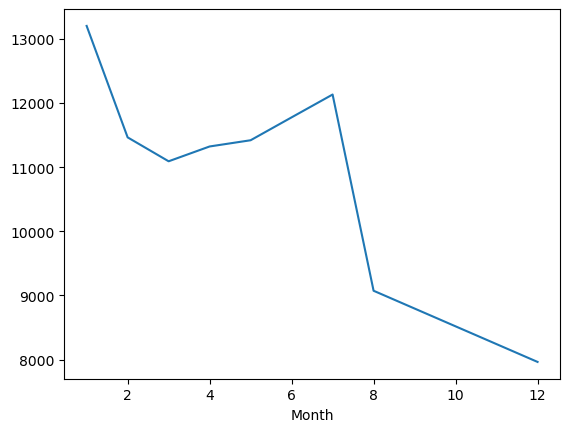

In [238]:
# Simple plot of calls per month NB:could be any column
byMonth['twp'].plot()

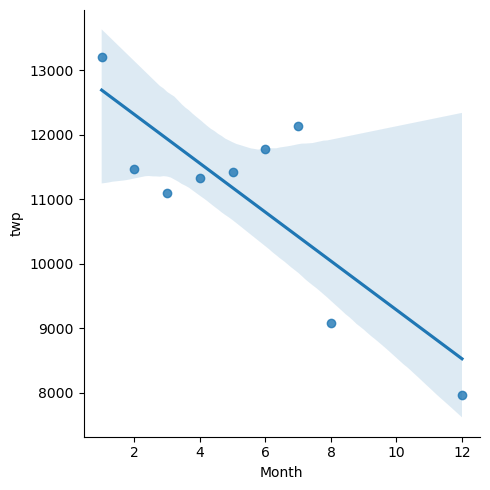

In [240]:
#  A linear fit on number of calls per month
sns.lmplot(data=byMonth.reset_index(),x='Month',y='twp')

In [241]:
# Create a new column from timestamp column using the apply and date function
df['Date'] = df['timeStamp'].apply(lambda t:t.date())

In [242]:
df.head(4)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week,Month,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,Thu,12,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,Thu,12,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,Thu,12,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,Thu,12,2015-12-10


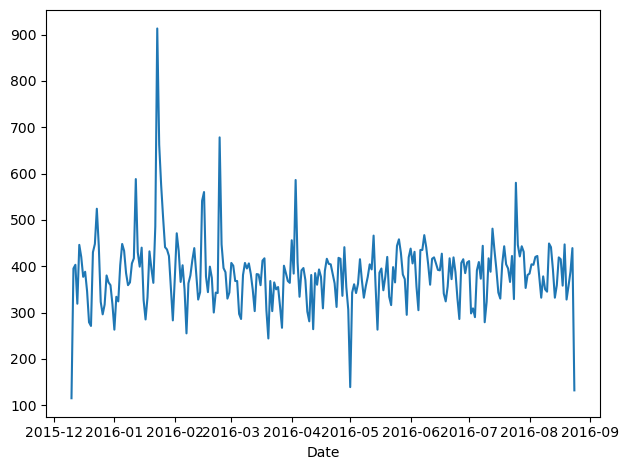

In [135]:
# Groupby Date Column,count and create plot for count
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

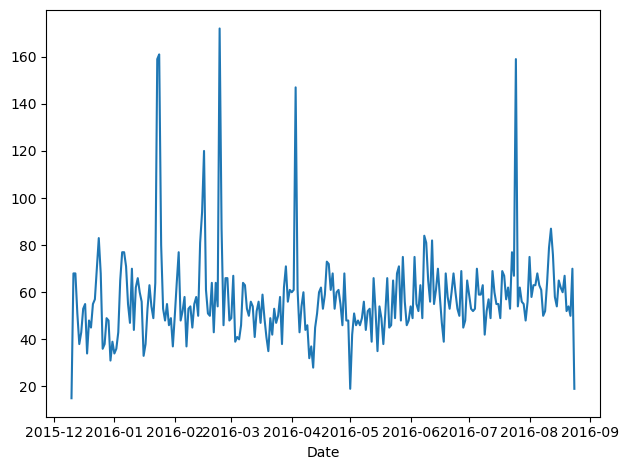

In [143]:
# Groupby date Column,count and create plot for count when case is fire
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.tight_layout()

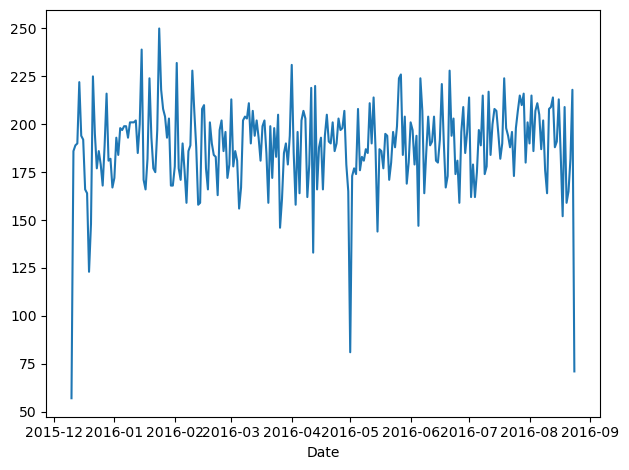

In [144]:
# Groupby date Column,count and create plot for count when case is EMS
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.tight_layout()

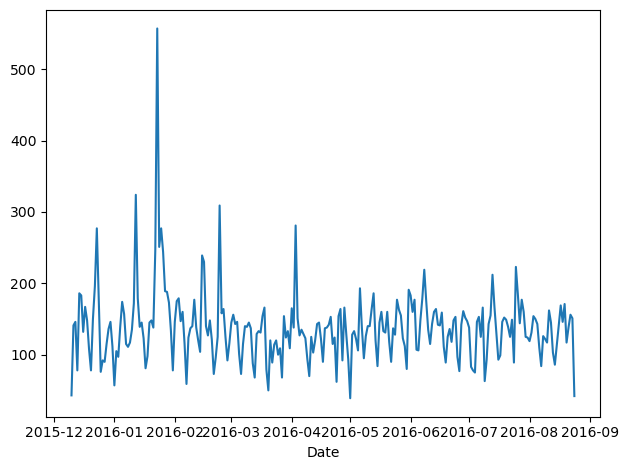

In [145]:
# Groupby date Column,count and create plot for count when case is Traffic
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.tight_layout()

In [171]:
# Group the DataFrame by 'Day of Week' and 'Hour', then count the number of occurrences of 'Reason' in each group
# The 'unstack()' function is used to pivot the 'Hour' level to columns
dayHour=df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack().head()
dayHour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


<Axes: xlabel='Hour', ylabel='Day of Week'>

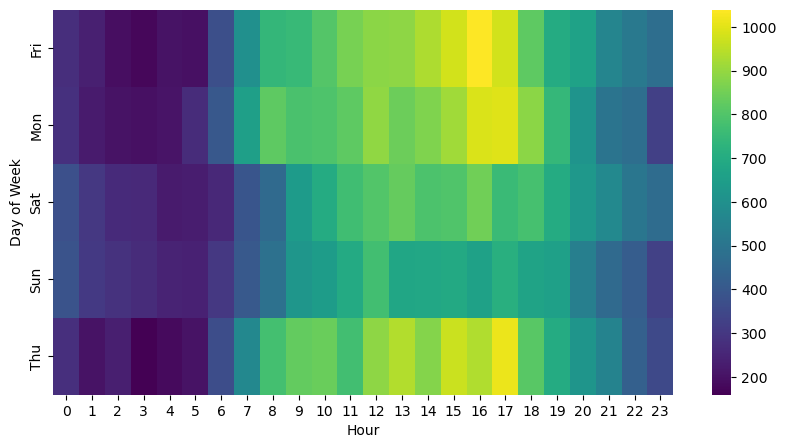

In [243]:
# Create a heatmap using the dayHour DataFrame with the 'viridis' color map
plt.figure(figsize=(10,5))
sns.heatmap(dayHour,cmap='viridis')

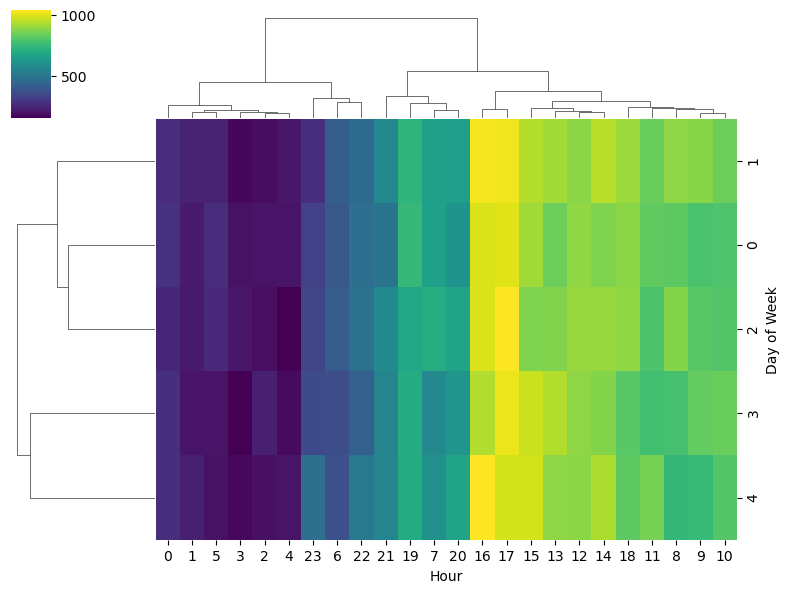

In [165]:
# Create a clustermap using the dayHour DataFrame with the 'viridis' color map
sns.clustermap(dayHour,cmap='viridis',figsize=(8,6))

In [172]:
# Group the DataFrame by 'Day of Week' and 'Month', then count the number of occurrences of 'Reason' in each group
# The 'unstack()' function is used to pivot the 'Hour' level to columns
dayMonth=df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack().head()
dayMonth

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


<Axes: xlabel='Month', ylabel='Day of Week'>

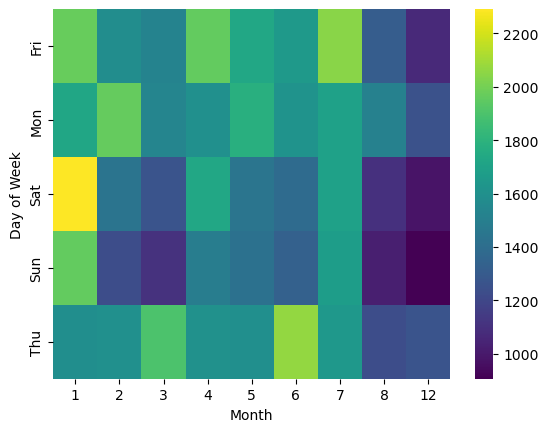

In [245]:
# Create a heatmap using the dayHour DataFrame with the 'viridis' color map
sns.heatmap(dayMonth,cmap='viridis')

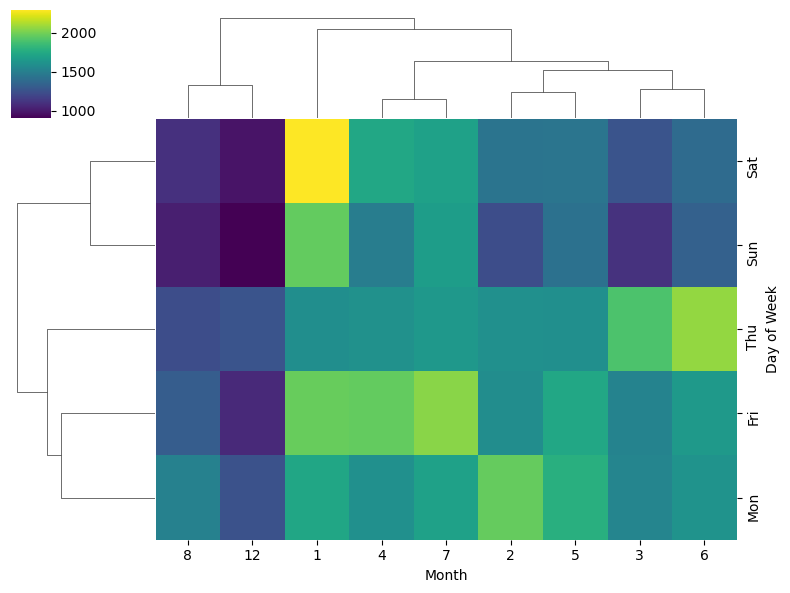

In [244]:
# Create a clustermap using the dayHour DataFrame with the 'viridis' color map
sns.clustermap(dayMonth,cmap='viridis',figsize=(8,6))